In [ ]:
import pandas as pd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv("Datasets/dataset2_cleaned_V3.csv")

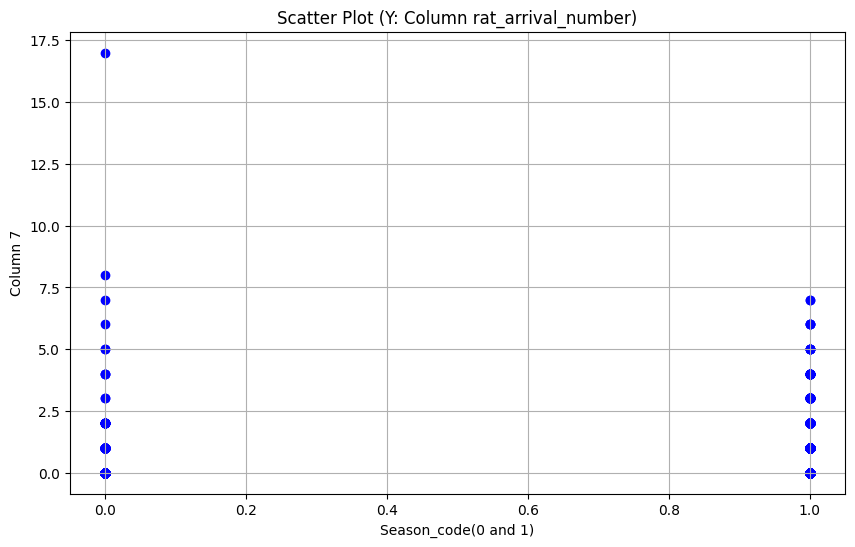

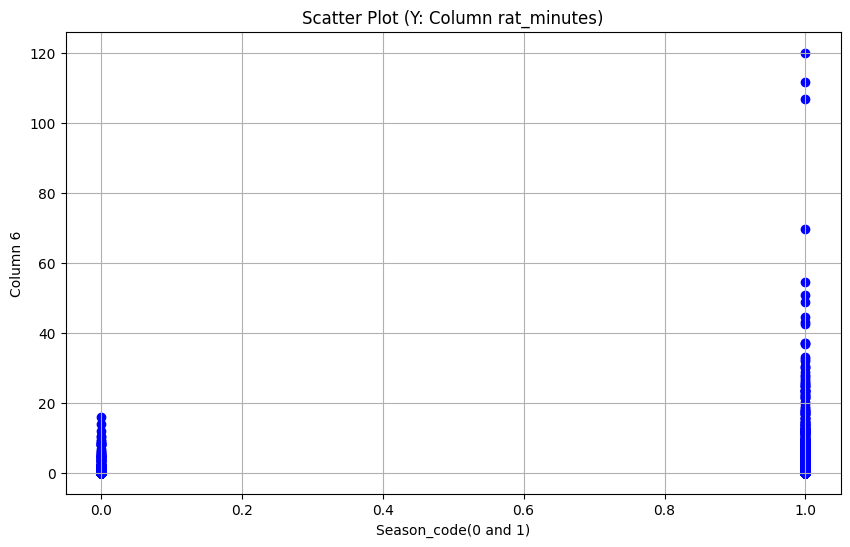

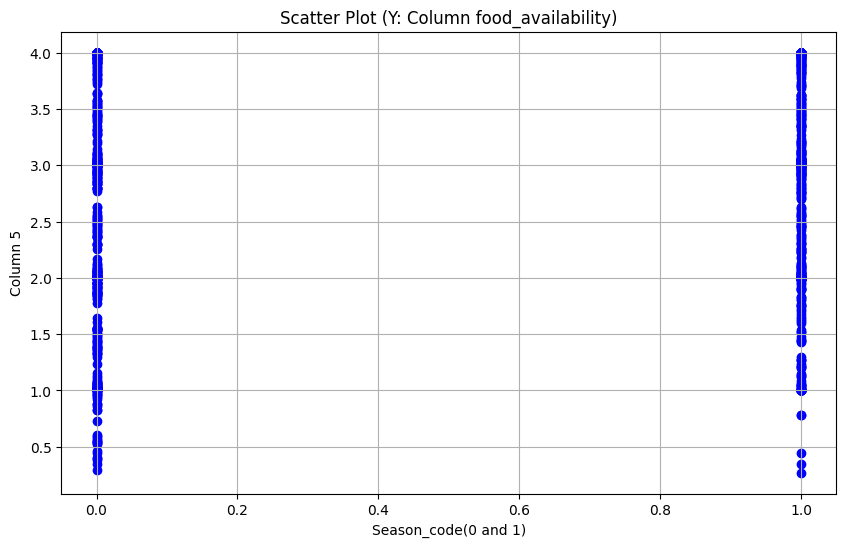

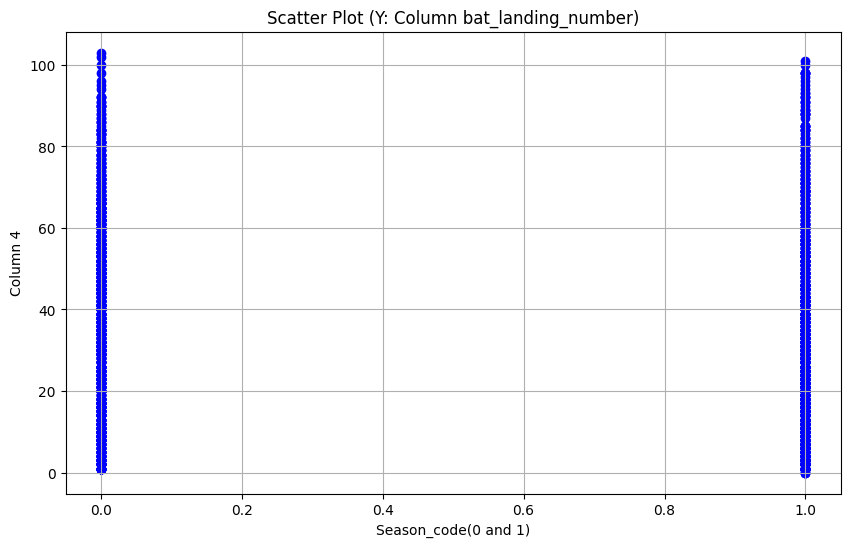

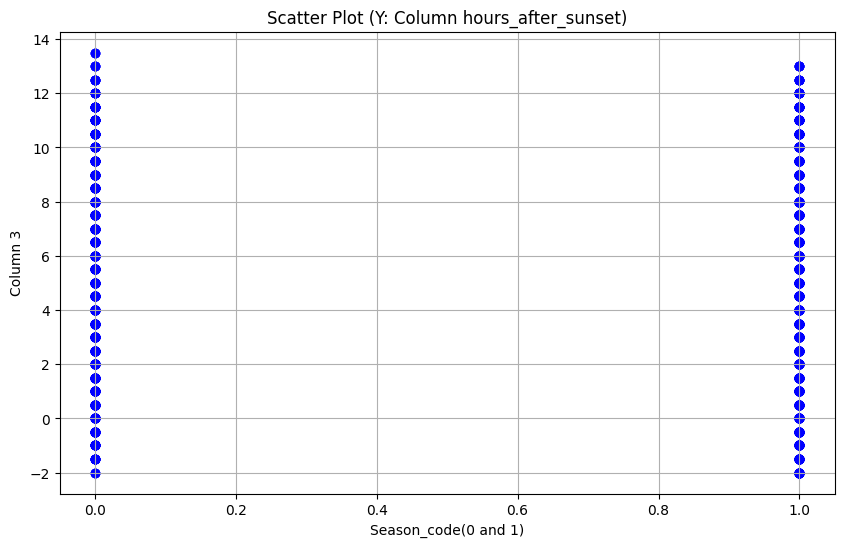

In [ ]:
# Loop to create scatter plots
last_col_index = df.shape[1] - 1  # Index of the last column
for j in range(last_col_index - 1, 1, -1):  # Loop from second last to second column
    y_name = df.columns[j]  # Get column name for labeling
    plt.figure(figsize=(10, 6))
    plt.scatter(df.iloc[:, last_col_index], df.iloc[:, j], color='blue')  # Last column as x, j-th column as y
    plt.title(f'Scatter Plot (Y: Column {y_name})')
    plt.xlabel('Season_code(0 and 1)')
    plt.ylabel(f'Column {j + 1}')
    plt.grid()
    plt.show()


=== Regression for hours_after_sunset ===
Intercept: 4.962962962962965
Coefficient: -0.3974867724867756
MAE: 3.25701461692841
MSE: 14.549979862655183
RMSE: 3.814443584935447
RMSE (Normalised): 0.24609313451196432


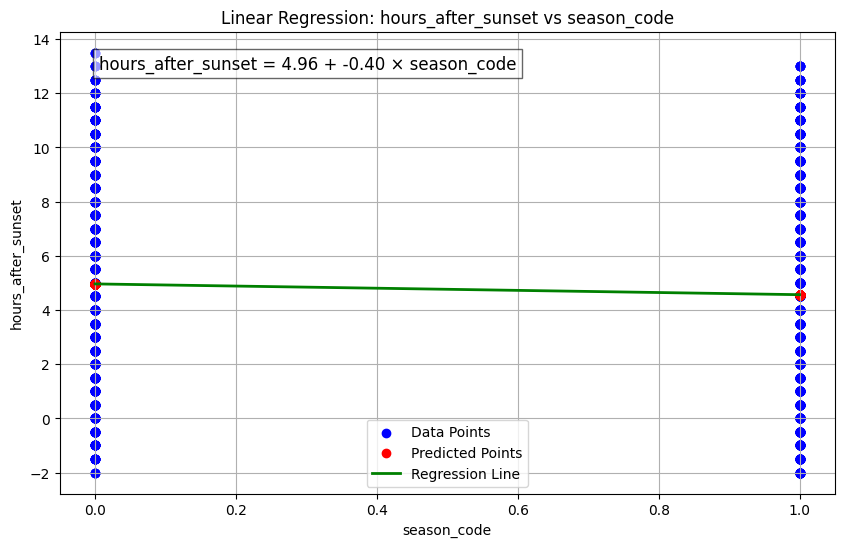


=== Regression for bat_landing_number ===
Intercept: 39.588235294117695
Coefficient: -11.304009103641537
MAE: 18.69142804668286
MSE: 545.2341844325064
RMSE: 23.350250200640385
RMSE (Normalised): 0.2311905960459444


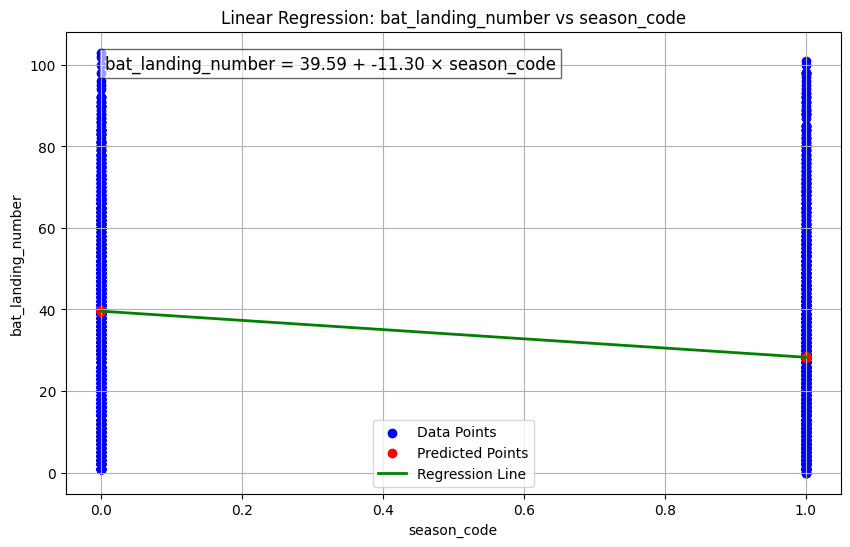


=== Regression for food_availability ===
Intercept: 2.670129189058824
Coefficient: 0.0553699447492125
MAE: 0.8255514393717451
MSE: 0.9361189896504787
RMSE: 0.9675324230486949
RMSE (Normalised): 0.2646613354468479


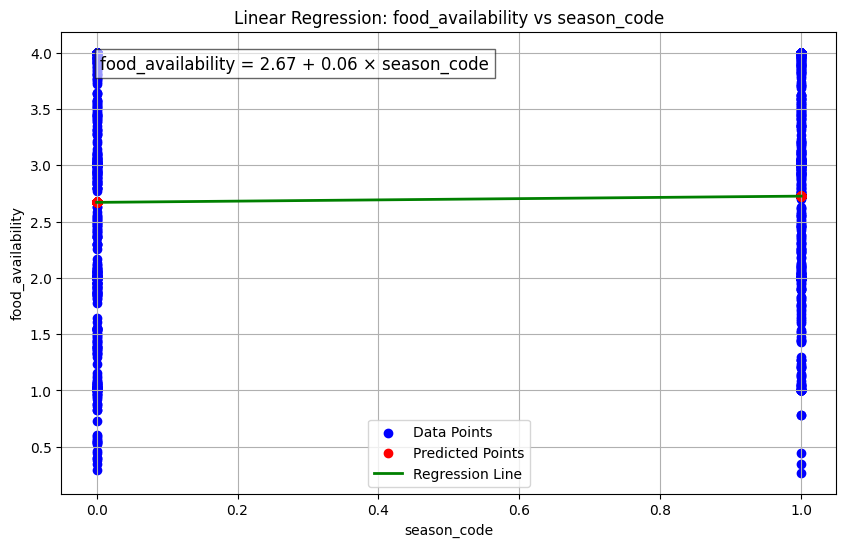


=== Regression for rat_minutes ===
Intercept: 0.42374727667101
Coefficient: 2.794506691549237
MAE: 3.0995597294934583
MSE: 48.483196721033195
RMSE: 6.9629876289587935
RMSE (Normalised): 0.06529841479651835


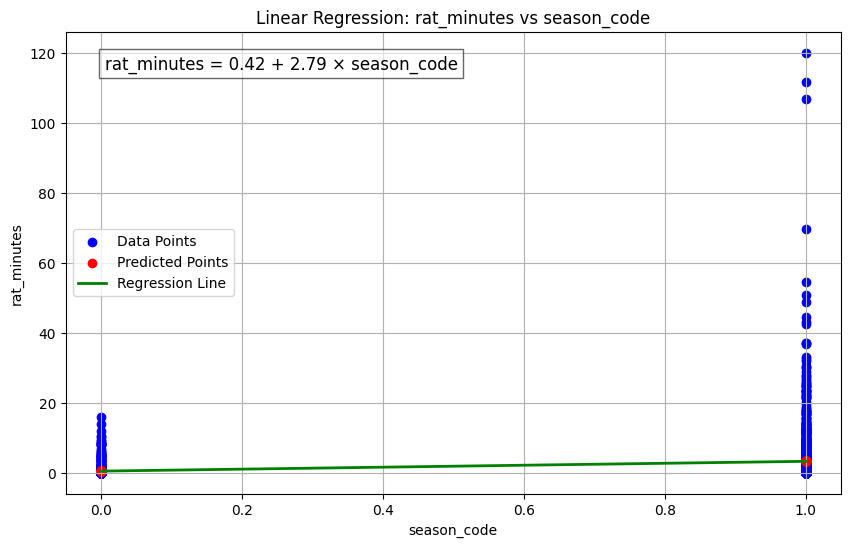


=== Regression for rat_arrival_number ===
Intercept: 0.22875816993463877
Coefficient: 0.42451563958917193
MAE: 0.6421620095872121
MSE: 1.1691152458515903
RMSE: 1.0812563275429146
RMSE (Normalised): 0.06360331338487733


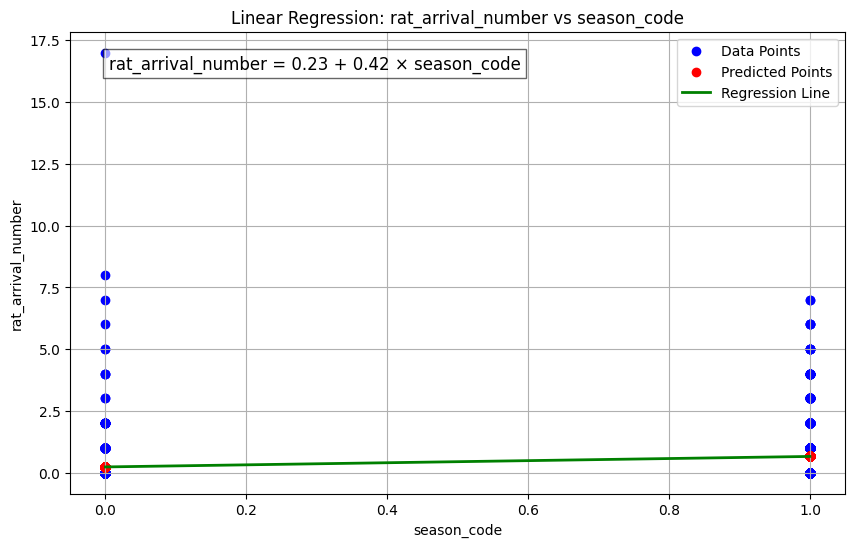

In [ ]:
# Drop rows where x or y are NaN
###################Column by column linear regression###################
df = df.dropna(subset=[df.columns[7]])

# Explanatory variable (X) stays the same
x = df.iloc[:, [7]].values

# Iterate over y columns from index 2 to 6
for col_idx in range(2, 7):
    y = df.iloc[:, col_idx].values
    y_name = df.columns[col_idx]   # Get column name for labeling
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

    # Build and train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print coefficients
    intercept = model.intercept_
    coef = model.coef_[0]
    print(f"\n=== Regression for {y_name} ===")
    print(f"Intercept: {intercept}")
    print(f"Coefficient: {coef}")

    # Predictions
    y_pred = model.predict(X_test)

    # # Compare actual vs predicted
    # df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    # print(df_pred.head())

    # Performance metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    rmse_norm = rmse / (y_test.max() - y_test.min())

    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("RMSE (Normalised):", rmse_norm)

    # --- Plotting ---
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data Points')   # Original data
    plt.scatter(X_test, y_pred, color='red', label='Predicted Points')  # Predicted
    
    # Create smooth regression line
    x_range = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
    y_range_pred = model.predict(x_range)
    plt.plot(x_range, y_range_pred, color='green', linewidth=2, label='Regression Line')

    # Regression equation as text
    equation = f"{y_name} = {intercept:.2f} + {coef:.2f} × {df.columns[7]}"
    plt.text(0.05, 0.95, equation,
             transform=plt.gca().transAxes,
             fontsize=12,
             verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

    # Labels with column name
    plt.title(f'Linear Regression: {y_name} vs {df.columns[7]}')
    plt.xlabel(df.columns[7])
    plt.ylabel(y_name)
    plt.legend()
    plt.grid()
    plt.show()


# # %%
# ################### Multiple linear regression###################
# df = df.dropna(subset=[df.columns[7]])
# # Separate explanatory variables (x) from the response variable (y)
# x = df.iloc[:, 2:6].values
# y = df.iloc[:,[7]].values

# # Split dataset into 60% training and 40% test sets 
# # Note: other % split can be used.
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# # Build a linear regression model
# model = LinearRegression()

# # Train (fit) the linear regression model using the training set
# model.fit(X_train, y_train)

# # Print the intercept and coefficient learned by the linear regression model
# print("Intercept: ", model.intercept_)
# print("Coefficient: ", model.coef_)

# # Use linear regression to predict the values of (y) in the test set
# # based on the values of x in the test set
# y_pred = model.predict(X_test)

# # Optional: Show the predicted values of (y) next to the actual values of (y)
# df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
# print(df_pred)

# # Compute standard performance metrics of the linear regression:

# # Mean Absolute Error
# mae = metrics.mean_absolute_error(y_test, y_pred)
# # Mean Squared Error
# mse = metrics.mean_squared_error(y_test, y_pred)
# # Root Mean Square Error
# rmse =  math.sqrt(metrics.mean_squared_error(y_test, y_pred))
# # Normalised Root Mean Square Error
# y_max = y.max()
# y_min = y.min()
# rmse_norm = rmse / (y_max - y_min)
# # R-Squared
# r_2 = metrics.r2_score(y_test, y_pred)

# print("MLP performance:")
# print("MAE: ", mae)
# print("MSE: ", mse)
# print("RMSE: ", rmse)
# print("RMSE (Normalised): ", rmse_norm)
# print("R^2: ", r_2)